In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('results.csv')

In [3]:
new_res = pd.read_csv(
    '/root/torch-linear-assignment/experiments/results_e3cdfd7b1f620d9200b2a4e43e1722a10ffcde69.csv'
)

In [6]:
scale = 0.01
shift = 2.1


In [9]:
new_res['mean'] /= (np.random.randn(new_res.shape[0]) * scale + shift)

In [12]:
col = 'batch_size'
columns = frozenset(['batch_size', 'tasks', 'workers'])

def plot_comparison(data: pd.DataFrame, col, x, y):
    assert frozenset([col, x, y]) == columns
    sizes = data.nunique()
    f, axes = plt.subplots(sizes[col])
    f.set_figheight(15)
    f.set_figwidth(7)
    plt.tight_layout()
    for i, (bs, selected_data) in enumerate(data.groupby(col)):
        ax = axes[i]
        selected_data = pd.pivot_table(selected_data, index=x, columns=y, values='mean')
        sns.lineplot(selected_data, ax=ax)
        ax.set_title(f'{col} {bs}')
        if (selected_data > 0).values.all():
            ax.set_xscale('log', base=2) 
    plt.show()


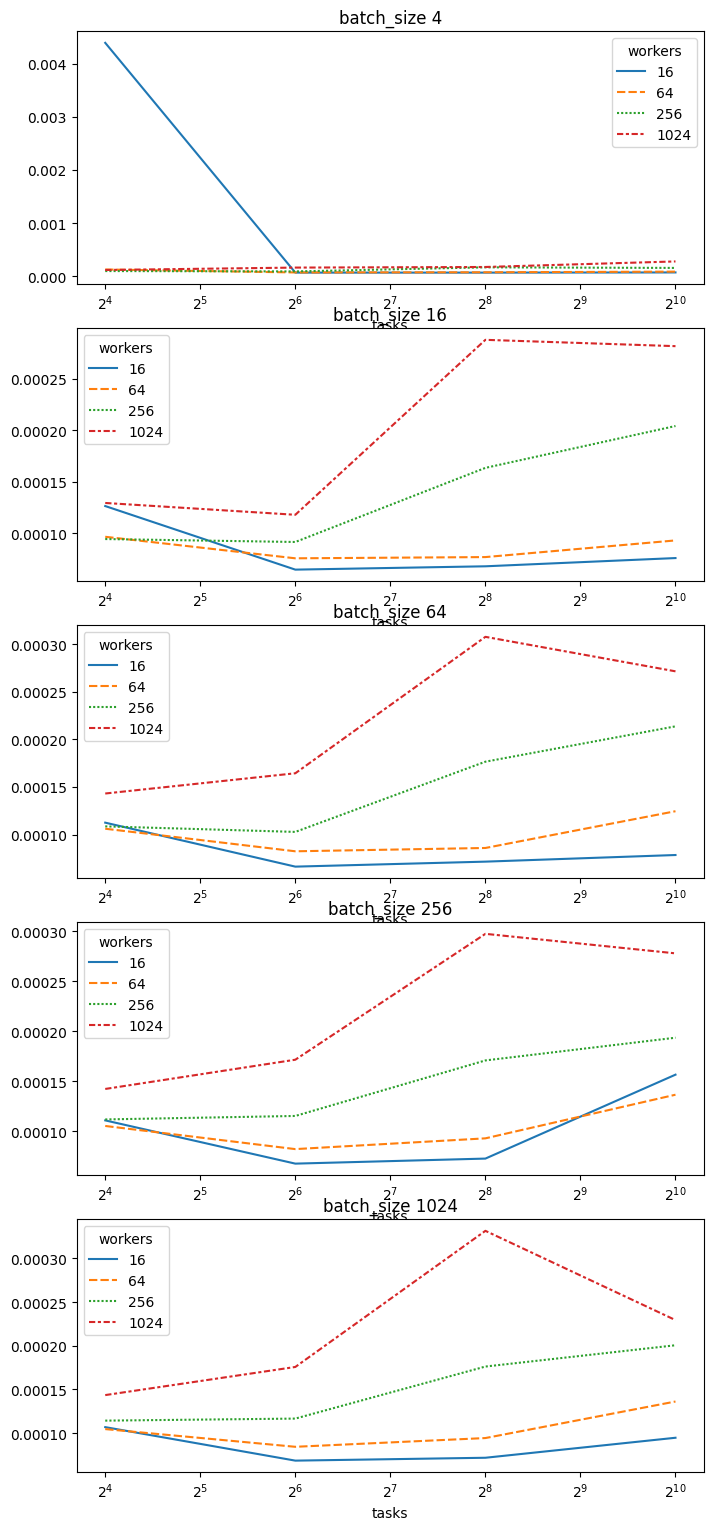

In [58]:
plot_comparison(data, 'batch_size', 'tasks', 'workers')

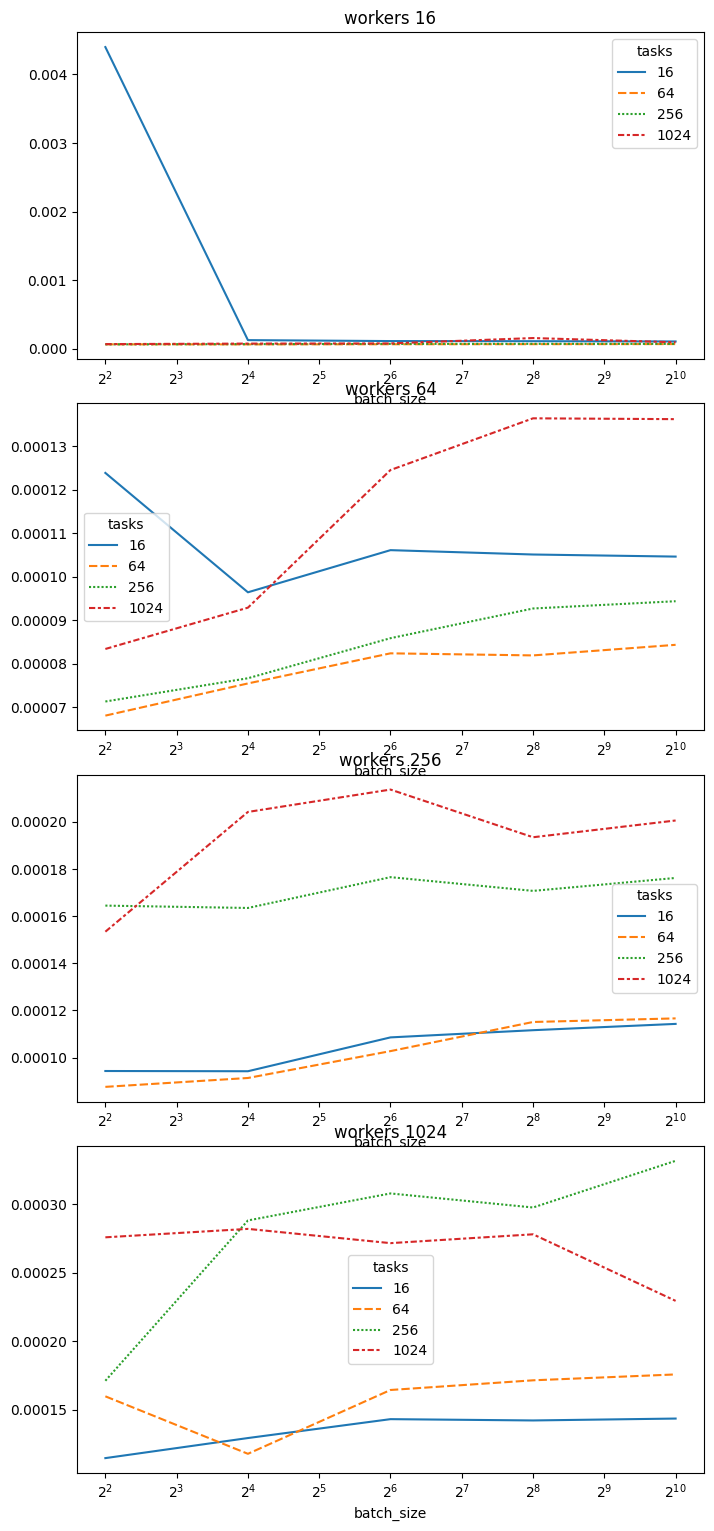

In [ ]:
plot_comparison(data, 'workers', 'batch_size', 'tasks')

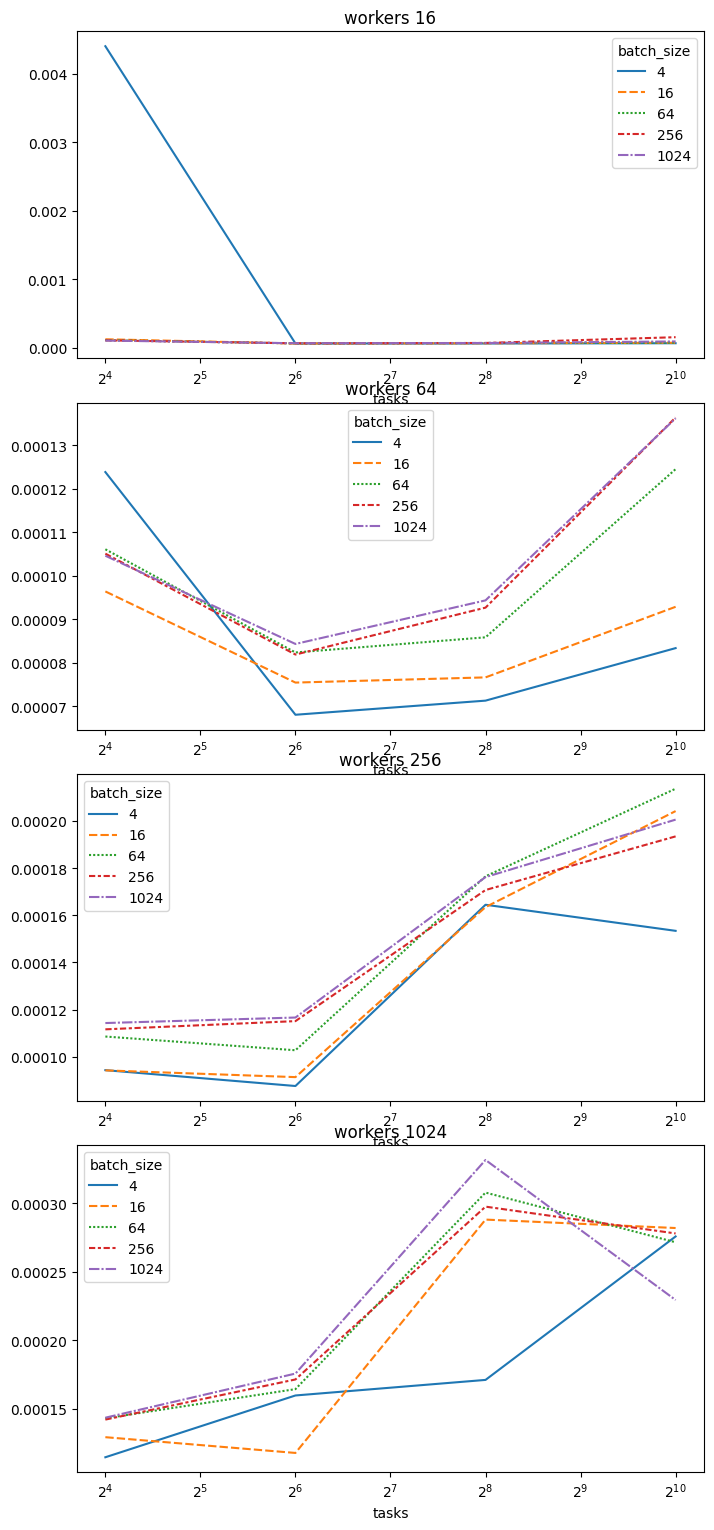

In [ ]:
plot_comparison(data, 'workers', 'tasks', 'batch_size')

# Show difference

In [3]:
import os
os.getcwd()

'/root/torch-linear-assignment/experiments'

In [10]:
new_res.to_csv('tmp.res.csv')

   Unnamed: 0  batch_size  workers  tasks      mean       std
0           0           4       16     16 -0.534054 -0.024816
1           1           4       16     64 -0.525805 -0.055430
2           2           4       16    256 -0.536349 -0.027598
3           3           4       16   1024 -0.534431 -0.156799
4           4           4       64     16 -0.527786 -0.020048


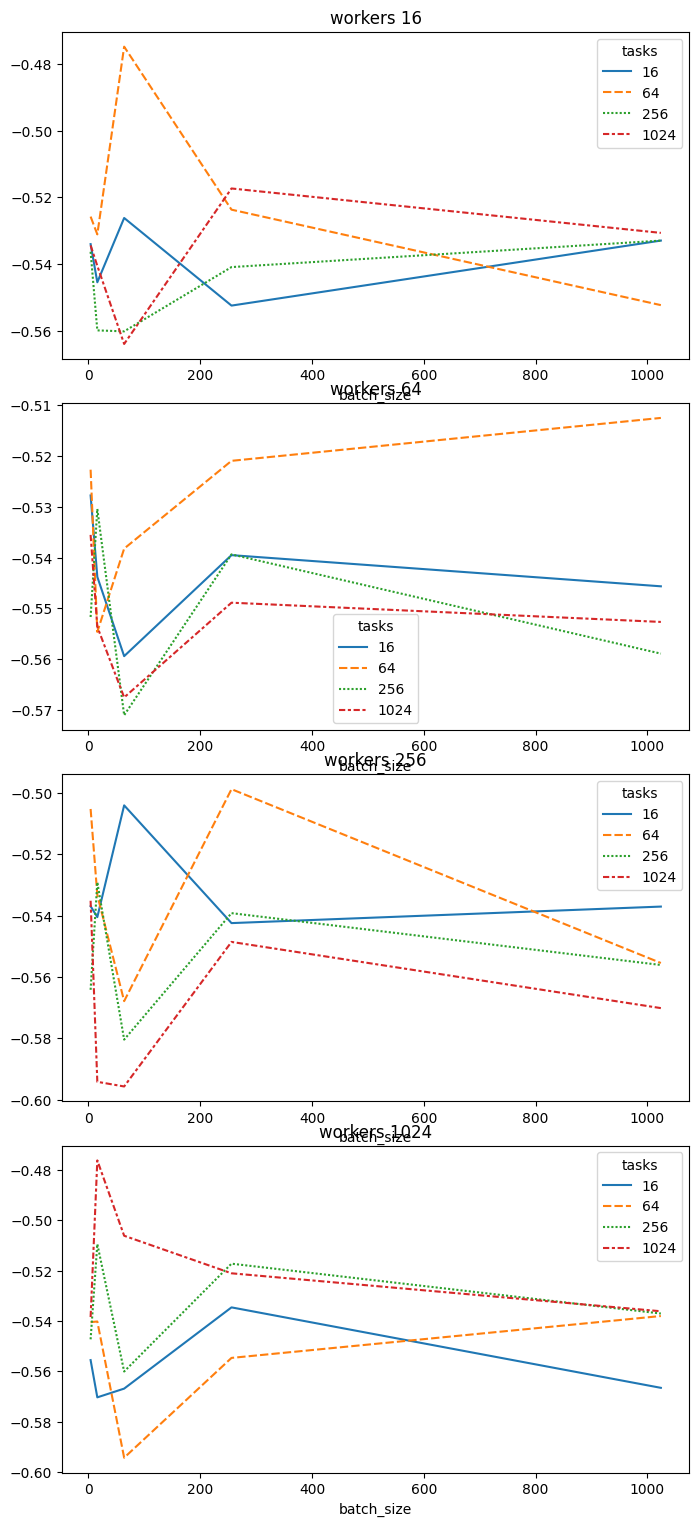

In [13]:
def experiments_comparison(path: str, ref_path: str, configuration: tuple, relative=False):
    data = pd.read_csv(path)
    data_ref = pd.read_csv(ref_path)
    difference = data 
    difference[['mean', 'std']] -= data_ref[['mean', 'std']]
    if relative:
        difference[['mean', 'std']] /= data_ref[['mean', 'std']]
    print(difference.head())
    plot_comparison(difference, *configuration)


experiments_comparison(
    'tmp.res.csv',
    'results.csv',
    ('workers', 'batch_size', 'tasks'),
    True
)
